<a href="https://colab.research.google.com/github/TadieB/pytorch-collab/blob/main/logisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

# Download and Visualize Datasets

In [4]:
# download training dataset
dataset = MNIST(root='data/',download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 110390791.97it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27924318.54it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 31751654.62it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13844861.02it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [6]:
len(dataset)

60000

In [7]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

label: 3


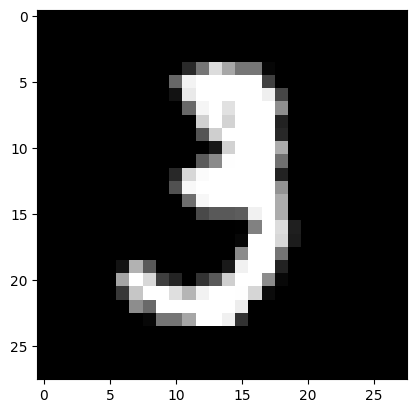

In [10]:
image,label = dataset[10]

plt.imshow(image,cmap='gray')
print('label:',label)

In [11]:
# pytorch doesn't know how to work with images. so convert them to tensors

import torchvision.transforms as transforms

In [12]:
# MNIST dataset (image and labels)
dataset = MNIST(root = 'data/',
                train = True,
                transform= transforms.ToTensor())

In [13]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [15]:
# img_tensor

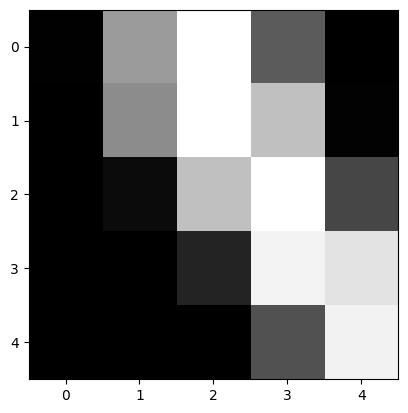

In [14]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

# Split Datasets into Training and Validation

In [16]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset,[50000, 10000])
len(train_ds),len(val_ds)


(50000, 10000)

In [17]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
# logistic regression model
model = nn.Linear(input_size, num_classes)

In [19]:
print(model.weight.shape)

torch.Size([10, 784])


In [20]:
model.weight

Parameter containing:
tensor([[-0.0269,  0.0142,  0.0141,  ...,  0.0148, -0.0149,  0.0138],
        [ 0.0189,  0.0155,  0.0356,  ...,  0.0275,  0.0115,  0.0041],
        [-0.0216,  0.0233, -0.0184,  ...,  0.0066, -0.0204,  0.0349],
        ...,
        [-0.0091,  0.0017,  0.0225,  ..., -0.0169,  0.0257,  0.0193],
        [-0.0218, -0.0111, -0.0248,  ...,  0.0346,  0.0089,  0.0338],
        [-0.0331, -0.0112, -0.0159,  ...,  0.0159,  0.0119,  0.0353]],
       requires_grad=True)

In [21]:
model.bias

Parameter containing:
tensor([ 0.0148, -0.0155,  0.0210,  0.0289, -0.0091,  0.0302, -0.0090,  0.0304,
         0.0013,  0.0096], requires_grad=True)

In [22]:
print(model.bias.shape)

torch.Size([10])


In [23]:
# for images, labels in train_loader:
#   print(labels)
#   print(images.shape)
#   outputs = model(images)
#   break

In [24]:
# To remove the above error, .reshape method of
# a tensor will allow us to efficiently
# view each image as a flat vector
# without really changing the underlying data.

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()

# the model nolonger has .weight, .bias attributes , they are inside the
#  . linear attribute, but it does have .parameters method which returns a list
# containing the weights and bias and can be used by a pyTorch optimize.

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0292,  0.0353, -0.0331,  ..., -0.0099,  0.0264,  0.0038],
         [ 0.0104,  0.0284, -0.0337,  ..., -0.0253,  0.0132,  0.0031],
         [ 0.0233, -0.0005, -0.0088,  ...,  0.0137, -0.0165,  0.0156],
         ...,
         [ 0.0251, -0.0010,  0.0095,  ..., -0.0010, -0.0110,  0.0008],
         [ 0.0350, -0.0336, -0.0016,  ..., -0.0003, -0.0196, -0.0349],
         [-0.0238,  0.0201, -0.0231,  ...,  0.0205,  0.0054,  0.0349]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0345,  0.0010, -0.0119,  0.0045, -0.0152, -0.0184, -0.0069, -0.0105,
          0.0138,  0.0057], requires_grad=True)]

In [27]:
for images, labels in train_loader:
  print('images.shape:', images.shape)
  outputs = model(images)
  break

print('outputs.shape:', outputs.shape)
print('sample outputs:\n',outputs[:2].data)

images.shape: torch.Size([128, 1, 28, 28])
outputs.shape: torch.Size([128, 10])
sample outputs:
 tensor([[-0.1572, -0.0351, -0.2238, -0.1825,  0.0415, -0.1195,  0.0927, -0.2180,
          0.0744,  0.1705],
        [-0.1263, -0.2617,  0.0170,  0.1748, -0.2277,  0.1145, -0.2082,  0.1000,
         -0.3070,  0.1271]])


In [28]:
outputs[0]

tensor([-0.1572, -0.0351, -0.2238, -0.1825,  0.0415, -0.1195,  0.0927, -0.2180,
         0.0744,  0.1705], grad_fn=<SelectBackward0>)

In [29]:
exps = torch.exp(outputs[0])
exps

tensor([0.8545, 0.9655, 0.7995, 0.8332, 1.0423, 0.8873, 1.0972, 0.8041, 1.0773,
        1.1859], grad_fn=<ExpBackward0>)

# SoftMax

In [30]:
# changing each output between 0 to 1, add up to 1.

probs = exps/torch.sum(exps)
probs

tensor([0.0895, 0.1011, 0.0837, 0.0873, 0.1092, 0.0929, 0.1149, 0.0842, 0.1128,
        0.1242], grad_fn=<DivBackward0>)

In [31]:
torch.sum(probs)

tensor(1., grad_fn=<SumBackward0>)

In [32]:
import torch.nn.functional as F

#apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#look at sample probabilities
print('Sample probabilities:\n', probs[:2].data)

#add up the probabilities of an output row
print('sum:', torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0895, 0.1011, 0.0837, 0.0873, 0.1092, 0.0929, 0.1149, 0.0842, 0.1128,
         0.1242],
        [0.0921, 0.0805, 0.1063, 0.1245, 0.0833, 0.1172, 0.0849, 0.1155, 0.0769,
         0.1187]])
sum: 1.0


In [33]:
# Determine the predicted label for each image by simply choosing
# the index of the element with the highest prob in each output row.

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

#Printed above are the predicted labels for the first batch of training images.

tensor([9, 3, 6, 7, 3, 9, 7, 9, 7, 0, 9, 7, 3, 3, 9, 3, 9, 9, 4, 7, 9, 5, 6, 3,
        6, 3, 9, 6, 9, 9, 3, 7, 3, 9, 3, 8, 9, 3, 4, 3, 9, 7, 6, 9, 9, 8, 3, 7,
        7, 9, 4, 7, 7, 8, 4, 5, 9, 8, 8, 9, 6, 9, 8, 3, 4, 3, 5, 9, 9, 3, 8, 3,
        6, 0, 6, 9, 8, 9, 3, 6, 8, 7, 6, 9, 1, 7, 9, 5, 8, 9, 9, 3, 9, 8, 7, 8,
        3, 3, 8, 9, 0, 3, 7, 3, 8, 9, 7, 7, 6, 3, 9, 8, 8, 7, 9, 7, 3, 8, 3, 9,
        7, 5, 9, 8, 3, 3, 9, 3])
tensor([0.1242, 0.1245, 0.1193, 0.1111, 0.1170, 0.1262, 0.1343, 0.1197, 0.1297,
        0.1219, 0.1318, 0.1144, 0.1348, 0.1307, 0.1319, 0.1204, 0.1362, 0.1281,
        0.1248, 0.1256, 0.1368, 0.1298, 0.1223, 0.1472, 0.1434, 0.1234, 0.1345,
        0.1335, 0.1265, 0.1278, 0.1284, 0.1349, 0.1462, 0.1282, 0.1409, 0.1175,
        0.1298, 0.1219, 0.1279, 0.1340, 0.1360, 0.1274, 0.1316, 0.1365, 0.1388,
        0.1184, 0.1295, 0.1309, 0.1457, 0.1705, 0.1122, 0.1489, 0.1266, 0.1135,
        0.1206, 0.1253, 0.1222, 0.1328, 0.1170, 0.1337, 0.1230, 0.1595, 0.1213,
       

# Evaluation Metric and Loss Function

## Accuracy Metric

In [36]:
# how well our medel is performing, % of labels that were correctly predicted.
# accuracy is non-continuous , nondifferentiable.

def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

# == performs an element-wise comparison of two tensors with the same shape
# and returns a tensor of the same shape,
# containing 0's for unequal elements,and 1s for equal elements. and then passing
# the result to torch.sum which returns sum of correctly predicted labels. finally
# divide by tota number of images/samples to get accuracy.



In [37]:
accuracy(outputs,labels)

tensor(0.0547)

## Loss Function

In [38]:
# cross entropy is differentiable and continuous.
loss_fn = F.cross_entropy


In [39]:
# loss for current batch of data
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3583, grad_fn=<NllLossBackward0>)


In [44]:
# interpret 2.23 loss?
pow = torch.tensor(loss)
torch.exp(-pow)
# predicted prob. of the correct label, on average.
#lower losss, better the model.

<ipython-input-44-89f423061743>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pow = torch.tensor(loss)


tensor(0.0946)

# Training the Model